# TF_IDF and Baseline Models

In [1]:
# importing libraries

# for data manipulation
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to vectorize text data
from sklearn.feature_extraction.text import TfidfVectorizer

# scikit model used
from sklearn.ensemble import RandomForestClassifier

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ticket_train.csv to ticket_train (2).csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ticket_valid.csv to ticket_valid (2).csv


In [4]:
# importing training dataset
train = pd.read_csv('ticket_train (2).csv')

# importing validating dataset
valid = pd.read_csv('ticket_valid (2).csv')

In [5]:
# top 5 records
train.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,5,13,105,32,3,4,search for old outlook thursday octob old hi f...
1,1,4,1,7,46,3,4,want to access account document want document ...
2,1,4,1,7,65,3,4,access right tuesday pm right hi instal comput...
3,0,4,21,41,32,1,3,pleas someon come and check the excel on thi c...
4,0,4,21,77,65,1,3,not work via sent thursday work via hi tri acc...


In [6]:
# top 5 records
valid.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,4,1,21,35,3,4,pend expens claim juli pm re pend expens claim...
1,1,5,13,7,32,3,4,us adapt adapt dear near futur go pleas help p...
2,0,4,51,78,4,2,0,intern audit leaver vs activ ad account leaver...
3,1,4,2,88,68,3,4,oracl list expens report pm expens report hi h...
4,1,4,3,88,56,3,4,cancel incid with progress task cancel incid p...


# TF-IDF transformation of training and validating set
### Training dataset

In [7]:
# vectorizer instance
tfidf = TfidfVectorizer(max_features=5000)

In [8]:
# fitting and transforming tfidf vectorizer
tfidf_train_df = pd.DataFrame(tfidf.fit_transform(train['info']).todense())
tfidf_train_df.columns = sorted(tfidf.vocabulary_)

# tfidf train dataframe
tfidf_train_df.head()

,ab,abandon,abc,abeam,abil,abl,abnorm,abort,about,abov,abroad,absenc,absent,absolut,abus,ac,academi,acceler,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplish,accord,accordingli,account,accru,accrual,accumul,accur,accuraci,ace,achiev,acknowledg,acm,acquir,...,wrong,wrongli,wrote,xerox,xma,xx,xxx,yahoo,yale,yammer,yard,ye,yea,yeah,year,yearli,yellow,yep,yesterday,yet,yield,you,your,yourself,yourselv,yr,yup,zag,zealand,zebra,zeiss,zen,zephyr,zero,zig,zion,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269423,0.160807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.131285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.082131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# concatenating tfidf_train_df with remainin features except info column
train_df = pd.concat([tfidf_train_df,train.drop(columns=['info'])], axis=1)

In [10]:
# final training set
train_df.head()

,ab,abandon,abc,abeam,abil,abl,abnorm,abort,about,abov,abroad,absenc,absent,absolut,abus,ac,academi,acceler,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplish,accord,accordingli,account,accru,accrual,accumul,accur,accuraci,ace,achiev,acknowledg,acm,acquir,...,yahoo,yale,yammer,yard,ye,yea,yeah,year,yearli,yellow,yep,yesterday,yet,yield,you,your,yourself,yourselv,yr,yup,zag,zealand,zebra,zeiss,zen,zephyr,zero,zig,zion,zip,zipper,zone,zoom,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,13,105,32,3,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269423,0.160807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,1,7,46,3,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.131285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,1,7,65,3,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,21,41,32,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.082131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,21,77,65,1,3


### Validating dataset

In [11]:
# transforming the valid dataset's info column using tfidf vectorizer
tfidf_valid_df = pd.DataFrame(tfidf.transform(valid['info']).todense())
tfidf_valid_df.columns = tfidf_train_df.columns

# final validation set
valid_df = pd.concat([tfidf_valid_df,valid.drop(columns=['info'])],axis=1)
valid_df.head()

,ab,abandon,abc,abeam,abil,abl,abnorm,abort,about,abov,abroad,absenc,absent,absolut,abus,ac,academi,acceler,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplish,accord,accordingli,account,accru,accrual,accumul,accur,accuraci,ace,achiev,acknowledg,acm,acquir,...,yahoo,yale,yammer,yard,ye,yea,yeah,year,yearli,yellow,yep,yesterday,yet,yield,you,your,yourself,yourselv,yr,yup,zag,zealand,zebra,zeiss,zen,zephyr,zero,zig,zion,zip,zipper,zone,zoom,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.032420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,1,21,35,3,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,13,7,32,3,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115065,0.0,0.288982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,51,78,4,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,2,88,68,3,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,3,88,56,3,4


# Data Modelling

Here, I am considering Random Forest Classifier, to predict the ticket-type by using rest features.

In [12]:
# features and target of training dataset
X_train = train_df.drop(columns=['ticket_type'])
y_train = train_df['ticket_type']

# features and target of validating dataset
X_valid = valid_df.drop(columns=['ticket_type'])
y_valid = valid_df['ticket_type']

In [13]:
# creating Random Forest Classifier instance
RFClf = RandomForestClassifier(random_state=35)

In [14]:
# fitting the model with training features and target
RFClf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

In [15]:
# predicting validating dataset ticket-type using validation dataset's features
y_valid_preds = RFClf.predict(X_valid)

# Model Evaluation

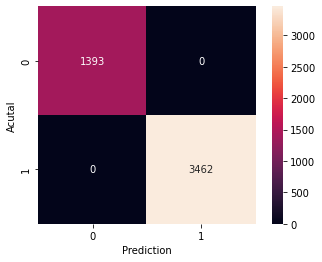

In [16]:
con_mat = confusion_matrix(y_valid, y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [17]:
acc = accuracy_score(y_valid, y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 100.00%.


In [18]:
print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      3462

    accuracy                           1.00      4855
   macro avg       1.00      1.00      1.00      4855
weighted avg       1.00      1.00      1.00      4855



# Fasttext Encoding + Random Forest Classifier

In [19]:
!pip install embedding-as-service

In [20]:
#importing libraries

# data manipulation
import pandas as pd
import numpy as np

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# encoding text information usinf fasttext encoder
from embedding_as_service.text.encode import Encoder

# scikit model used
from sklearn.ensemble import RandomForestClassifier

# hypertuning model
from sklearn.model_selection import RandomizedSearchCV

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# importing training dataset
train = pd.read_csv('ticket_train.csv')

# importing validating dataset
valid = pd.read_csv('ticket_valid.csv')

## Fasttext Encoding

In [22]:
# initialising encoder
fasttext_en = Encoder(embedding='fasttext', model='common_crawl_300')

903it [00:00, 9029.21it/s]

Loading Model (this might take few minutes).....


1999995it [03:43, 8959.78it/s]

Model loaded Successfully !


### Encoding training datasets

In [23]:
# encoding training dataset
fasttext_train_vecs = fasttext_en.encode(texts = list(train['info'].values), pooling='reduce_mean')

In [24]:
fasttext_train_vecs.shape

(38839, 300)

In [25]:
fasttext_train_vecs

array([[ 0.00642109, -0.00736094, -0.00565078, ...,  0.01260078,
        -0.00929766, -0.00514922],
       [ 0.00256172,  0.00128047, -0.00835781, ..., -0.01101406,
         0.00139844,  0.01202734],
       [-0.01013438,  0.01790625, -0.00660312, ..., -0.01692813,
        -0.00839141, -0.00939531],
       ...,
       [ 0.00094297, -0.00193359, -0.01193906, ..., -0.00394609,
         0.00141016, -0.00152422],
       [-0.01053594,  0.01842578, -0.01777422, ..., -0.00280391,
        -0.00259531, -0.00115703],
       [ 0.00671328,  0.03589688, -0.04677266, ...,  0.00667266,
        -0.11348047, -0.06379297]])

### Encoding validating datasets

In [26]:
# encoding validation dataset
fasttext_valid_vecs = fasttext_en.encode(texts = list(valid['info'].values), pooling='reduce_mean')

In [27]:
fasttext_valid_vecs.shape

(4855, 300)

## Modelling

In [28]:
# creating Random Forest Classifier instance
RFClf = RandomForestClassifier(random_state=35)

In [29]:
# fitting the model with training fasttext encoded vector and target ticket_type column
RFClf.fit(fasttext_train_vecs, train['ticket_type'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

In [30]:
# predicting validating dataset ticket-type using validation fasttext encoded vector
y_valid_preds = RFClf.predict(fasttext_valid_vecs)

## Model Evaluation

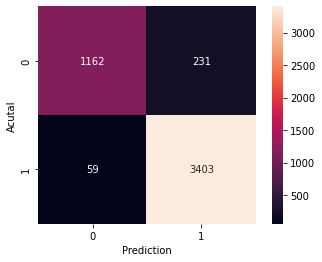

In [31]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [32]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 94.03%.


In [33]:
print(classification_report(valid['ticket_type'], y_valid_preds))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1393
           1       0.94      0.98      0.96      3462

    accuracy                           0.94      4855
   macro avg       0.94      0.91      0.92      4855
weighted avg       0.94      0.94      0.94      4855



### With class-weight='balanced'

In [34]:
# creating Random Forest Classifier instance
RFClf_bal = RandomForestClassifier(random_state=35, class_weight='balanced')

# fitting the model with training fasttext encoded vector and target ticket_type column
RFClf_bal.fit(fasttext_train_vecs, train['ticket_type'])

# predicting validating dataset ticket-type using validation fasttext encoded vector
y_valid_preds_bal = RFClf_bal.predict(fasttext_valid_vecs)

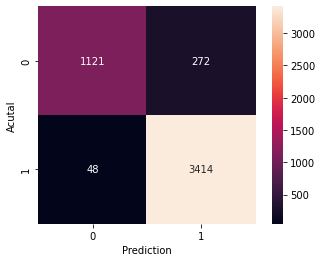

In [35]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds_bal)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [36]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds_bal)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 93.41%.


In [37]:
print(classification_report(valid['ticket_type'], y_valid_preds_bal))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1393
           1       0.93      0.99      0.96      3462

    accuracy                           0.93      4855
   macro avg       0.94      0.90      0.92      4855
weighted avg       0.94      0.93      0.93      4855



## Hypertuning the model

In [38]:
# grid for randomized search
params_grid = {'n_estimators' : np.arange(10,100,10),
        'max_depth' : [None, 3, 5, 10],
        'criterion' : ['gini', 'entropy']}

In [39]:
# initiating new Random Forest Classifier instance
clf = RandomForestClassifier(random_state=35, class_weight='balanced')

# creating a hyper-tuned model
ht_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = params_grid,
                            n_iter = 10,
                            cv = 3,
                            verbose = True)

In [40]:
ht_clf.fit(fasttext_train_vecs, train['ticket_type'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [41]:
# best parameters
ht_clf.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}

In [42]:
# maximum score achieved on training dataset
ht_clf.best_score_

0.9315121006570924

## Initialising Final HyperTuned Model

In [43]:
# creating final model
final_model = RandomForestClassifier(random_state = 35,
                                     class_weight = 'balanced',
                                     criterion = 'entropy',
                                     max_depth = None,
                                     n_estimators = 50)

In [44]:
# fitting final model
final_model.fit(fasttext_train_vecs, train['ticket_type'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

In [45]:
from google.colab import files
uploaded = files.upload()

Saving ticket_test.csv to ticket_test.csv


In [46]:
# importing testing dataset
test = pd.read_csv('ticket_test.csv')

In [47]:
# encoding testing dataset
fasttext_test_vecs = fasttext_en.encode(texts = list(test['info'].values), pooling='reduce_mean')

In [48]:
# predicting validating dataset ticket-type using validation fasttext encoded vector
y_test_preds = final_model.predict(fasttext_test_vecs)

### Final Model Evaluation

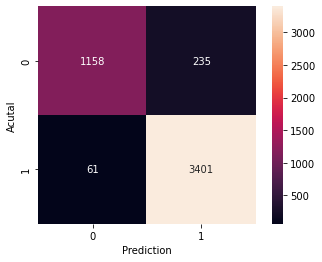

In [49]:
con_mat = confusion_matrix(test['ticket_type'], y_test_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [50]:
acc = accuracy_score(test['ticket_type'], y_test_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 93.90%.


In [51]:
print(classification_report(test['ticket_type'], y_test_preds))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1393
           1       0.94      0.98      0.96      3462

    accuracy                           0.94      4855
   macro avg       0.94      0.91      0.92      4855
weighted avg       0.94      0.94      0.94      4855



### **THANK YOU**